In [260]:
import pandas as pd
# import imputer
from sklearn.impute import SimpleImputer
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import label encoder
from sklearn.preprocessing import LabelEncoder
# import hot encoding
from sklearn.preprocessing import OneHotEncoder
# import train test split
from sklearn.model_selection import train_test_split
# import linear regression
from sklearn.linear_model import LinearRegression
# import r2 score
from sklearn.metrics import r2_score
# import matplotlib for plotting
import matplotlib.pyplot as plt

In [261]:
datasets = pd.read_csv('staffs.csv')
datasets.head(10)

,Name,Age,Gender,Position,Income
0,Person_1,56.0,Male,Designer,81240.0
1,Person_2,59.0,Male,Intern,50235.0
2,Person_3,39.0,Male,Analyst,73420.0
3,Person_4,55.0,Male,Manager,114837.0
4,Person_5,51.0,Female,Manager,117167.0
5,Person_6,36.0,Female,Analyst,54773.0
6,Person_7,51.0,Female,Analyst,62721.0
7,Person_8,47.0,NaN,Designer,65466.0
8,Person_9,21.0,Male,Intern,20953.0
9,Person_10,33.0,Male,Analyst,68195.0


In [262]:
# title of the csv data
datasets.columns

Index(['Name', 'Age', 'Gender', 'Position', 'Income'], dtype='object')

In [263]:
# remove the Name column
datasets = datasets.drop(['Name'], axis=1)
datasets.head(10)

,Age,Gender,Position,Income
0,56.0,Male,Designer,81240.0
1,59.0,Male,Intern,50235.0
2,39.0,Male,Analyst,73420.0
3,55.0,Male,Manager,114837.0
4,51.0,Female,Manager,117167.0
5,36.0,Female,Analyst,54773.0
6,51.0,Female,Analyst,62721.0
7,47.0,NaN,Designer,65466.0
8,21.0,Male,Intern,20953.0
9,33.0,Male,Analyst,68195.0


In [264]:
# check if uniqueness in gender
print(datasets['Gender'].unique(), "\n")
print(datasets['Position'].unique())

['Male' 'Female' nan] 

['Designer' 'Intern' 'Analyst' 'Manager' 'Developer' nan]


In [265]:
datasets['Age'].unique()

array([56., 59., 39., 55., 51., 36., 47., 21., 33., 27., 60., 43., 25.,
       44., 41., 23., 30., 26., nan, 38., 54., 48., 50., 34., 45., 49.,
       29., 32., 46., 31., 57., 37., 58., 53., 52., 35., 40., 20., 24.,
       42., 28., 22.])

In [266]:
# check null values
print(datasets.isnull().sum())

Age         50
Gender      50
Position    50
Income      50
dtype: int64


In [267]:
imputer = SimpleImputer(strategy='mean')

In [268]:
# replace the null values in income with mean , (also replace nulls in age)
datasets['Income'] = imputer.fit_transform(datasets[['Income']])
datasets['Age'] = imputer.fit_transform(datasets[['Age']])
datasets.head(10)

,Age,Gender,Position,Income
0,56.0,Male,Designer,81240.0
1,59.0,Male,Intern,50235.0
2,39.0,Male,Analyst,73420.0
3,55.0,Male,Manager,114837.0
4,51.0,Female,Manager,117167.0
5,36.0,Female,Analyst,54773.0
6,51.0,Female,Analyst,62721.0
7,47.0,NaN,Designer,65466.0
8,21.0,Male,Intern,20953.0
9,33.0,Male,Analyst,68195.0


In [269]:
# replace the null values in Gender with the most frequent value
gender_most_freq = datasets['Gender'].mode()[0]
print(gender_most_freq)
datasets['Gender'] = datasets['Gender'].fillna(gender_most_freq)

# replace the null values in Position with the most frequent value
position_most_freq = datasets['Position'].mode()[0]
print(position_most_freq)
datasets['Position'] = datasets['Position'].fillna(position_most_freq)
datasets.head(10)

Male
Analyst


,Age,Gender,Position,Income
0,56.0,Male,Designer,81240.0
1,59.0,Male,Intern,50235.0
2,39.0,Male,Analyst,73420.0
3,55.0,Male,Manager,114837.0
4,51.0,Female,Manager,117167.0
5,36.0,Female,Analyst,54773.0
6,51.0,Female,Analyst,62721.0
7,47.0,Male,Designer,65466.0
8,21.0,Male,Intern,20953.0
9,33.0,Male,Analyst,68195.0


In [270]:
# check if null values still exist
print(datasets.isnull().sum())

Age         0
Gender      0
Position    0
Income      0
dtype: int64


In [271]:
# scaler and encoder
scaler = StandardScaler()
encoder = LabelEncoder()
hot_encoder = OneHotEncoder()
# linear regression model
model = LinearRegression()

In [272]:
# Check unique values of Gender
print(datasets['Gender'].unique(), "Unique values of Gender \n")
# Check unique values of Position
print(datasets['Position'].unique(), "Unique values of Position \n")

['Male' 'Female'] Unique values of Gender 

['Designer' 'Intern' 'Analyst' 'Manager' 'Developer'] Unique values of Position 



In [273]:
# Since we have only two unique values in Gender, we can use label encoding
datasets['Gender'] = datasets['Gender'].astype(str)
# encode gender
datasets['Gender'] = encoder.fit_transform(datasets['Gender'])
# print the encoded values for each gender (there corresponding numerical values, in a dictionary format {"male": 0, "female": 1})
mapping = {label: idx for idx, label in enumerate(encoder.classes_)}
print(mapping, "Gender mapping \n")

# We have more than two unique values in Position, so we will use one hot encoding
# encode position
position_encoded = hot_encoder.fit_transform(datasets[['Position']]).toarray()
print(position_encoded, "Position encoded \n")
# create a DataFrame with the encoded position
position_df = pd.DataFrame(position_encoded, columns=hot_encoder.get_feature_names_out(['Position']))
print(position_df.head(10), "Position DataFrame \n")
# concatenate the original DataFrame with the encoded position DataFrame
datasets = pd.concat([datasets, position_df], axis=1)
# drop the original Position column
datasets = datasets.drop(['Position'], axis=1)


{'Female': 0, 'Male': 1} Gender mapping 

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]] Position encoded 

   Position_Analyst  Position_Designer  Position_Developer  Position_Intern  \
0               0.0                1.0                 0.0              0.0   
1               0.0                0.0                 0.0              1.0   
2               1.0                0.0                 0.0              0.0   
3               0.0                0.0                 0.0              0.0   
4               0.0                0.0                 0.0              0.0   
5               1.0                0.0                 0.0              0.0   
6               1.0                0.0                 0.0              0.0   
7               0.0                1.0                 0.0              0.0   
8               0.0                0.0                 0.0              1.0   
9               1.0                

In [274]:
# scale the Age and Income columns
datasets[['Age']] = scaler.fit_transform(datasets[['Age']])
datasets.head(10)

,Age,Gender,Income,Position_Analyst,Position_Designer,Position_Developer,Position_Intern,Position_Manager
0,1.345205,1,81240.0,0.0,1.0,0.0,0.0,0.0
1,1.609026,1,50235.0,0.0,0.0,0.0,1.0,0.0
2,-0.149776,1,73420.0,1.0,0.0,0.0,0.0,0.0
3,1.257265,1,114837.0,0.0,0.0,0.0,0.0,1.0
4,0.905505,0,117167.0,0.0,0.0,0.0,0.0,1.0
5,-0.413596,0,54773.0,1.0,0.0,0.0,0.0,0.0
6,0.905505,0,62721.0,1.0,0.0,0.0,0.0,0.0
7,0.553745,1,65466.0,0.0,1.0,0.0,0.0,0.0
8,-1.732697,1,20953.0,0.0,0.0,0.0,1.0,0.0
9,-0.677416,1,68195.0,1.0,0.0,0.0,0.0,0.0


In [275]:
# x should be age, gender, and position while y should be income
X = datasets[['Age', 'Gender'] + list(position_df.columns)]
y = datasets['Income']
print(X.head(10), "X DataFrame \n")
print(y.head(10), "Y DataFrame \n")

        Age  Gender  Position_Analyst  Position_Designer  Position_Developer  \
0  1.345205       1               0.0                1.0                 0.0   
1  1.609026       1               0.0                0.0                 0.0   
2 -0.149776       1               1.0                0.0                 0.0   
3  1.257265       1               0.0                0.0                 0.0   
4  0.905505       0               0.0                0.0                 0.0   
5 -0.413596       0               1.0                0.0                 0.0   
6  0.905505       0               1.0                0.0                 0.0   
7  0.553745       1               0.0                1.0                 0.0   
8 -1.732697       1               0.0                0.0                 0.0   
9 -0.677416       1               1.0                0.0                 0.0   

   Position_Intern  Position_Manager  
0              0.0               0.0  
1              1.0               0.0  
2 

In [276]:
# logo out the length of the X and y DataFrames
print(len(X), "Length of X DataFrame \n")
print(len(y), "Length of Y DataFrame \n")

1000 Length of X DataFrame 

1000 Length of Y DataFrame 



In [277]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
# train the linear regression model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [279]:
y_pred = model.predict(X_test)
print(y_pred, "Predicted Income \n")

[ 73058.48961131  84327.9090724   39238.16062634  69457.45847195
  36711.94544405  63585.18267774  82760.61815567  61878.81292509
  65995.50616851 112701.79812291 119204.80783688  76749.26352554
  68941.7963679   66415.58118561  75141.44263209 110690.42516887
 111321.97896445  84655.27954239  96654.80165824 111953.53276002
  58836.93563876  57785.30682609  72099.56534575 105637.9948043
 113216.64035116  73362.67293689 106901.10239545  74625.78052804
 105310.62433432  81497.51056453  79562.31920109  67258.61375965
 102152.85535646  69153.27514637  58836.93563876  63141.92051624
  75584.7047936   67562.79708524  58089.49015167 104047.51674317
  25343.97712377  39565.53109633  67702.69579696  60731.59702547
  73994.22673247  57573.82804761  69573.35016347  83392.17195124
  98690.90305302  98222.09257496  64965.0018362   64520.9197989
  28197.56277604  48711.4675599   24408.24000262 110994.60849446
  62322.0750866   63889.36600333  86222.57045911  74854.60213883
  37670.86970961  26934.455

In [280]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8394556888122368


# Visualize the results

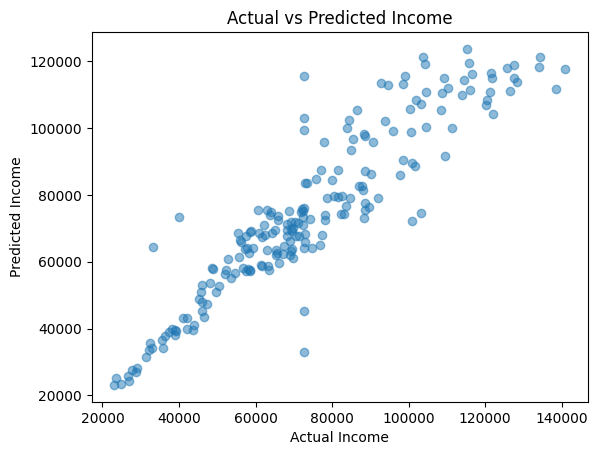

In [281]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted Income")
plt.show()